<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/Bollinger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


ESTRATÉGIA

1. fechou fora-fechou dentro com o ultimo fechamento 3 tr da sma20, entra no rompimento de máxima / mínima do ultimo dia
2. stop no fundo/topo do ff-fd, saída se chegar na media 20 dos fechamentos



In [102]:
codigo = 'TGMA3'
periodo='max'

In [103]:
import pandas as pd
import numpy as np
import copy
import datetime
import yfinance as yf
import os

In [104]:
def reset_data() :
  data=pd.read_csv(os.getcwd()+'/data/data.csv')
  data.set_index(data['Date'],inplace=True)
  data.drop(columns=['Date'],axis=1,inplace=True)
 

In [105]:
data = pd.DataFrame()
data = yf.download(tickers=codigo+'.SA' , period=periodo , progress = False  , auto_adjust=True)

In [106]:
import talib 

data['u_bb'], data['bb_m'], data['l_bb'] = talib.BBANDS(data['Close'], timeperiod = 20)
data['atr'] = talib.ATR(high=data['High'],close=data['Close'],low=data['Low'], timeperiod=20)

In [107]:
data

Open       High        Low      Close   Volume       u_bb  \
Date                                                                         
2007-07-03  14.169562  14.656303  14.169562  14.169562  2543100        NaN   
2007-07-04  14.272322  14.883453  14.272322  14.602224   202500        NaN   
2007-07-05  14.602221  16.116525  14.602221  15.618968   351600        NaN   
2007-07-06  15.597339  16.468064  15.575705  16.224693   328500        NaN   
2007-07-10  15.954279  16.765514  15.954279  16.284182    91000        NaN   
...               ...        ...        ...        ...      ...        ...   
2024-10-28  29.389999  29.740000  29.330000  29.740000   196600  29.626866   
2024-10-29  29.740000  29.959999  29.120001  29.120001   196600  29.882742   
2024-10-30  29.070000  29.709999  28.930000  29.350000   248200  30.150866   
2024-10-31  29.270000  29.580000  29.049999  29.520000   273500  30.411087   
2024-11-01  29.500000  29.540001  29.100000  29.360001   159200  30.570231   

               bb_m       l_bb       atr  
Date                                      
2007-07-03      NaN        NaN       NaN  
2007-07-04      NaN        NaN       NaN  
2007-07-05      NaN        NaN       NaN  
2007-07-06      NaN        NaN       NaN  
2007-07-10      NaN        NaN       NaN  
...             ...        ...       ...  
2024-10-28  27.1390  24.651134  0.638759  
2024-10-29  27.2660  24.649258  0.648821  
2024-10-30  27.3895  24.628134  0.655380  
2024-10-31  27.5525  24.693914  0.649111  
2024-11-01  27.7325  24.894769  0.638656  

[4305 rows x 9 columns]

In [108]:
data.dropna(inplace=True)
data.to_csv(os.getcwd()+'/data/data.csv')

### entrada

In [109]:
desvio = 2.95 # atrs

# Compra
signalB = np.where((data['Close'].shift(2) < data['l_bb'].shift(2))        #anteontem fechou fora
                  & (data['Close'].shift(1) > data['l_bb'].shift(1))       #ontem fechou dentro
                  & (np.abs(data['Close'] - data['bb_m']) > desvio*data['atr']) # e fechou longe da média
                  & (data['Close'] >= np.maximum(data['Close'].shift(1),data['Close'].shift(2)) ) # hoje rompeu as maximas
                  , 1, 0)
# Venda descoberta
signalS = np.where((data['Close'].shift(2) > data['u_bb'].shift(2))          #anteontem fechou fora
                  & (data['Close'].shift(1) < data['u_bb'].shift(1))         #ontem fechou dentro
                  & (np.abs(data['Close'] - data['bb_m']) > desvio*data['atr'])   # e fechou longe da média
                  & (data['Close'] <= np.minimum(data['Close'].shift(1),data['Close'].shift(2)) ) # hoje rompeu as minimas
                  , -1, 0)
data['signal'] = signalB + signalS

In [110]:
data

Open       High        Low      Close  Volume       u_bb  \
Date                                                                        
2007-08-01  16.251734  16.765516  16.219285  16.765516   38200  17.697787   
2007-08-02  17.198169  17.198169  16.657347  17.035923   56100  17.462621   
2007-08-03  17.035925  17.035925  16.495102  16.987251   15400  17.405307   
2007-08-06  16.954806  16.981847  16.230103  16.376125   47900  17.395800   
2007-08-07  16.765512  17.144088  16.224689  17.035923  105500  17.420364   
...               ...        ...        ...        ...     ...        ...   
2024-10-28  29.389999  29.740000  29.330000  29.740000  196600  29.626866   
2024-10-29  29.740000  29.959999  29.120001  29.120001  196600  29.882742   
2024-10-30  29.070000  29.709999  28.930000  29.350000  248200  30.150866   
2024-10-31  29.270000  29.580000  29.049999  29.520000  273500  30.411087   
2024-11-01  29.500000  29.540001  29.100000  29.360001  159200  30.570231   

                 bb_m       l_bb       atr  signal  
Date                                                
2007-08-01  16.503215  15.308643  0.765806       0  
2007-08-02  16.624900  15.787179  0.754557       0  
2007-08-03  16.693314  15.981321  0.743870       0  
2007-08-06  16.700886  16.005972  0.744534       0  
2007-08-07  16.738473  16.056582  0.753277       0  
...               ...        ...       ...     ...  
2024-10-28  27.139000  24.651134  0.638759       0  
2024-10-29  27.266000  24.649258  0.648821       0  
2024-10-30  27.389500  24.628134  0.655380       0  
2024-10-31  27.552500  24.693914  0.649111       0  
2024-11-01  27.732500  24.894769  0.638656       0  

[4285 rows x 10 columns]

In [111]:
aux = data[(data['signal']== 1) | (data['signal']== -1)].copy()

### saída

In [112]:
m=len(data)

i=0
while (i < m -1) :
    while (i < m -1 and data['signal'].iloc[i] == 0) : i+=1
    j=i
    if data['signal'].iloc[j] == 1 :
        while (j < m-1 and data['Close'].iloc[j] < data['bb_m'].iloc[j]  ) : j+=1
    else:
        while (j < m-1 and data['Close'].iloc[j] > data['bb_m'].iloc[j]  ) : j+=1
    # data.iloc[i:j,'signal'] = data['signal'].iloc[i]
    data.loc[data.index[i]:data.index[j],'signal'] = data['signal'].iloc[i]

    i=j+1



In [113]:
data

Open       High        Low      Close  Volume       u_bb  \
Date                                                                        
2007-08-01  16.251734  16.765516  16.219285  16.765516   38200  17.697787   
2007-08-02  17.198169  17.198169  16.657347  17.035923   56100  17.462621   
2007-08-03  17.035925  17.035925  16.495102  16.987251   15400  17.405307   
2007-08-06  16.954806  16.981847  16.230103  16.376125   47900  17.395800   
2007-08-07  16.765512  17.144088  16.224689  17.035923  105500  17.420364   
...               ...        ...        ...        ...     ...        ...   
2024-10-28  29.389999  29.740000  29.330000  29.740000  196600  29.626866   
2024-10-29  29.740000  29.959999  29.120001  29.120001  196600  29.882742   
2024-10-30  29.070000  29.709999  28.930000  29.350000  248200  30.150866   
2024-10-31  29.270000  29.580000  29.049999  29.520000  273500  30.411087   
2024-11-01  29.500000  29.540001  29.100000  29.360001  159200  30.570231   

                 bb_m       l_bb       atr  signal  
Date                                                
2007-08-01  16.503215  15.308643  0.765806       0  
2007-08-02  16.624900  15.787179  0.754557       0  
2007-08-03  16.693314  15.981321  0.743870       0  
2007-08-06  16.700886  16.005972  0.744534       0  
2007-08-07  16.738473  16.056582  0.753277       0  
...               ...        ...       ...     ...  
2024-10-28  27.139000  24.651134  0.638759       0  
2024-10-29  27.266000  24.649258  0.648821       0  
2024-10-30  27.389500  24.628134  0.655380       0  
2024-10-31  27.552500  24.693914  0.649111       0  
2024-11-01  27.732500  24.894769  0.638656       0  

[4285 rows x 10 columns]

In [114]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=1) #go.Figure()
fig.add_trace(go.Scatter(x = data.index , y = data['Close'].values , name="preço"),1,1)
fig.add_trace(go.Scatter(x = data.index , y = data['u_bb'].values, mode='lines', 
                         line=dict(color='firebrick', width=2, dash='dash'), name="mms20"),1,1)
fig.add_trace(go.Scatter(x = data.index , y = data['l_bb'].values, mode='lines', 
                         line=dict(color='gray', width=2, dash='dash'), name="upper bb"),1,1)
fig.add_trace(go.Scatter(x = data.index , y = data['bb_m'].values, mode='lines', 
                         line=dict(color='gray', width=2, dash='dash'), name="lower bb"),1,1)
fig.add_trace(go.Scatter(x = aux.index, y = data['Close'] , mode='markers' ,name='sinal',
                             marker=dict(size=12, symbol="arrow", angle=45, line=dict(width=2, color="DarkSlateGrey"))
                         ),1,1)
fig.update_traces(
    marker=dict(size=12, symbol="arrow", angle=45, line=dict(width=2, color="DarkSlateGrey")),
    selector=dict(mode="markers"),
)
# fig.add_trace(go.Scatter(x = df.loc[sai].index, y = df.loc[sai]['Close '+ativo] , mode='markers' ,name='Saida',
#                          marker=dict(size=12, symbol="arrow", angle=-135, line=dict(width=2, color="red"))
#                          ),1,1)
fig.add_trace(go.Scatter(x = data.index , y = data['signal'].values , name="sinal"),2,1)


fig.add_trace(go.Scatter(x =data.index , y = data['atr'].values*desvio , mode='lines', name=f"{desvio}*ATR"),3,1)


fig.show()

In [115]:
data['retrn'] =  np.log(data['Close']) - np.log(data['Close'].shift(1))
data['strategy_returns'] = data['retrn'] * (data['signal'].shift(1))

In [116]:
print(f"Strategy returns: {data['strategy_returns'].cumsum().iloc[-1]}")


Strategy returns: -0.46814820358255327


In [117]:
print("Buy and hold returns:",data['retrn'].cumsum().iloc[-1])


Buy and hold returns: 0.5603090499146892


In [118]:
df = data.copy()
df["Date"]=df.index

# feriados

inicio = df.index[0].strftime("%Y-%m-%d")
fim = df.index[-1].strftime("%Y-%m-%d")

url = 'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/feriados.csv'

feriado = pd.read_csv(url)
feriado['Data'] =  pd.to_datetime(feriado['Data'], format='%d/%m/%Y')
feriado.set_index(feriado.Data, inplace=True)
feriado['Data'] = feriado['Data'].astype(str)
lista = feriado.Data.loc[inicio:fim].values

# feriados

# import plotly.io as pio
# pio.renderers.default = 'vscode'


fig = make_subplots(rows=3, cols=1,
                          #shared_xaxes=True,
                          vertical_spacing=0.05,
                          subplot_titles=(codigo, 'sinal C/V', 'ATR'),
                          row_width=[0.1, 0.2, 0.4])

fig.append_trace({ 'x': df.Date,
           'open': df.Open,
           'close': df.Close,
           'high': df.High,
           'low': df.Low,
           'type': 'candlestick',
           'name': codigo,
           'showlegend': True }
, row=1, col=1 )

fig.append_trace(go.Scatter( name="sma20",
                 line=dict(color='lightblue'),
    x=df.index,
    y=df.bb_m,
), row=1, col=1)

fig.append_trace(go.Scatter( name="sma20 + 2dp",
                 line=dict(color='lightgreen'),
    x=df.index,
    y=df.u_bb,
), row=1, col=1 )

fig.append_trace(go.Scatter( name="sma20 - 2dp",
                 line=dict(color='lightgreen'),
    x=df.index,
    y=df.l_bb,
), row=1, col=1)

fig.append_trace(go.Scatter(x = data.index , y = data['signal'].values , name="sinal"),2,1)
fig.update_traces(
    marker=dict(size=12, symbol="arrow", angle=45, line=dict(width=2, color="DarkSlateGrey")),
    selector=dict(mode="markers"),)

fig.append_trace(go.Scatter( name="sinal C/V",
    x = df.Date,
    y = df.atr,
), row=3, col=1)

fig.append_trace(go.Scatter( name="sinal C/V",
    x = df.Date,
    y = df.signal,
), row=2, col=1)

fig.update_xaxes(
        rangeslider_visible=False,
        rangebreaks=[
            # {'pattern':'day of week' , 'bounds':[6,1] , 'pattern':'hour' , 'bound':[18,10]},
            # NOTE: Below values are bound (not single values), ie. hide x to y
            #dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            #dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            dict(values=lista)#["2018-12-24","2019-12-24", "2020-12-24", "2021-12-24", "2022-12-24"]) ,
            #dict(values=["2018-12-25","2019-12-25", "2020-12-25", "2021-12-24", "2022-12-24"]) ,
            #dict(values=["2018-01-01","2019-01-01", "2020-01-01", "2021-01-01", "2022-01-01"])
        ]
    )

fig.update_layout(height=900, width=1200)

fig.show()


<Axes: xlabel='Date'>

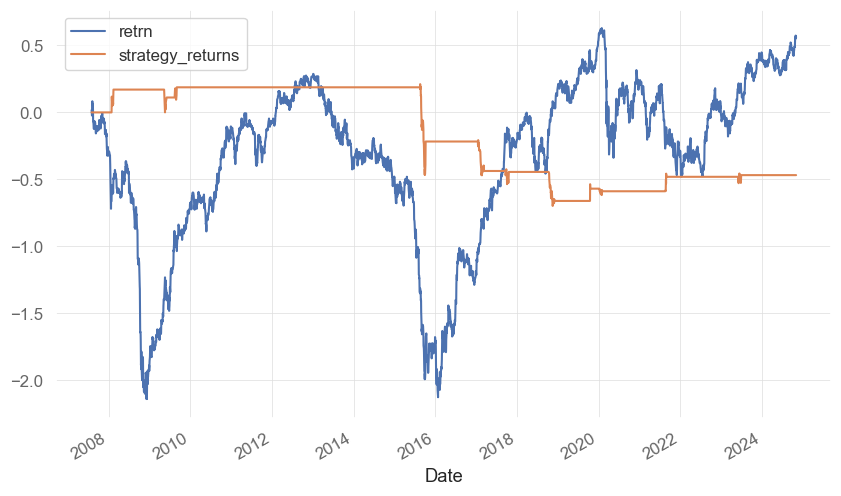

In [119]:
data[['retrn','strategy_returns']].cumsum().plot()


In [120]:
import quantstats as qs

help(qs.reports.full)

Help on function full in module quantstats.reports:

full(returns, benchmark=None, rf=0.0, grayscale=False, figsize=(8, 5), display=True, compounded=True, periods_per_year=252, match_dates=True, **kwargs)



                           Strategy
-------------------------  ----------
Start Period               2007-08-02
End Period                 2024-11-01
Risk-Free Rate             0.0%
Time in Market             5.0%

Cumulative Return          -43.13%
CAGR﹪                     -2.23%

Sharpe                     -0.26
Prob. Sharpe Ratio         14.96%
Smart Sharpe               -0.22
Sortino                    -0.37
Smart Sortino              -0.32
Sortino/√2                 -0.26
Smart Sortino/√2           -0.23
Omega                      0.82

Max Drawdown               -61.96%
Longest DD Days            3362
Volatility (ann.)          10.68%
Calmar                     -0.04
Skew                       2.49
Kurtosis                   120.57

Expected Daily %           -0.01%
Expected Monthly %         -0.27%
Expected Yearly %          -3.09%
Kelly Criterion            -10.06%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.12%
Expected Shortfall (cVaR)  -1.12%

Max Consecut

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2015-08-20  2018-11-16  2024-11-01  3362    -61.964848        -60.505296
2  2009-05-13  2009-05-20  2009-08-17    97    -15.857124        -14.188389
3  2009-08-19  2009-08-27  2009-09-01    14     -8.126117         -7.817849
4  2008-01-31  2008-02-06  2008-02-12    13     -6.476150         -5.822108

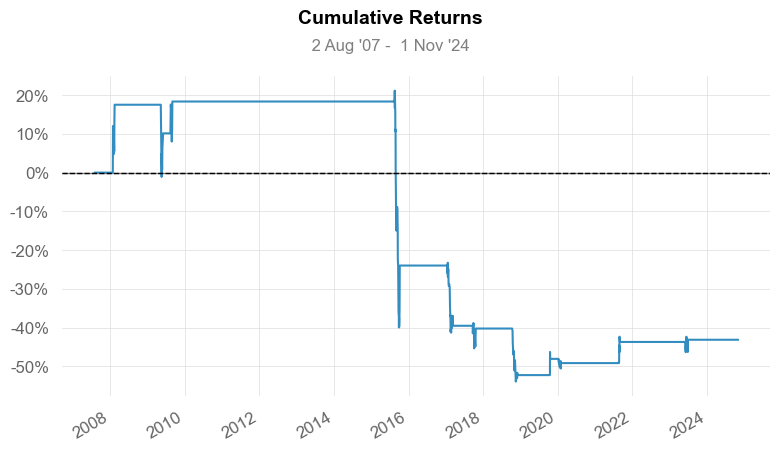

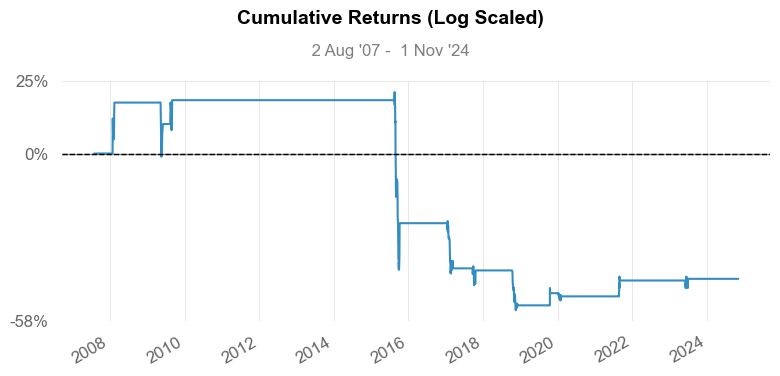

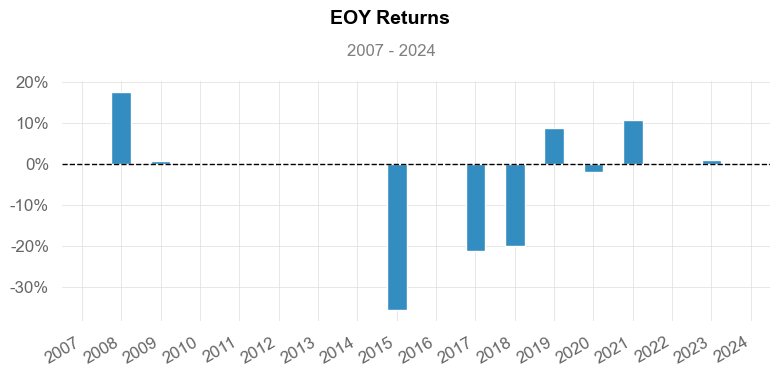

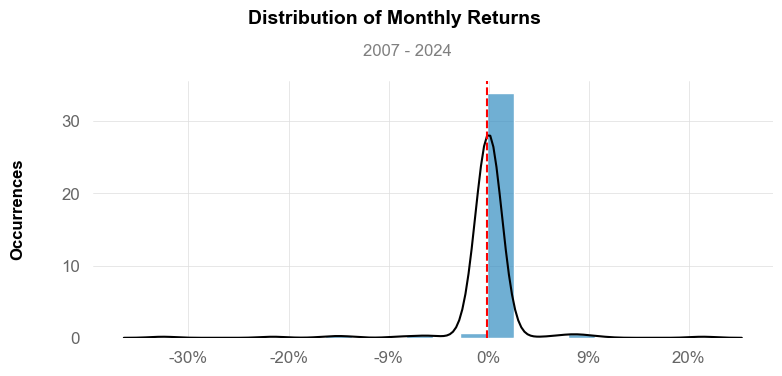

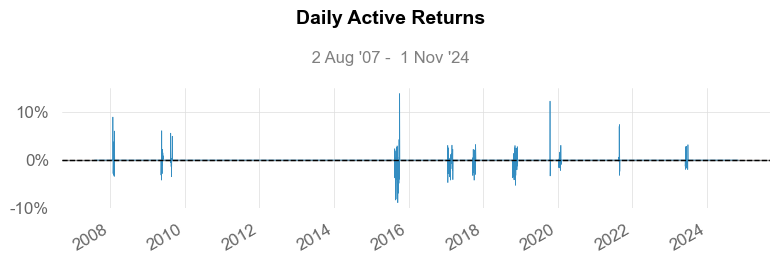

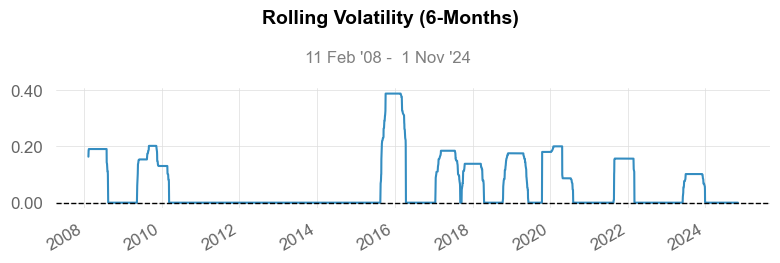

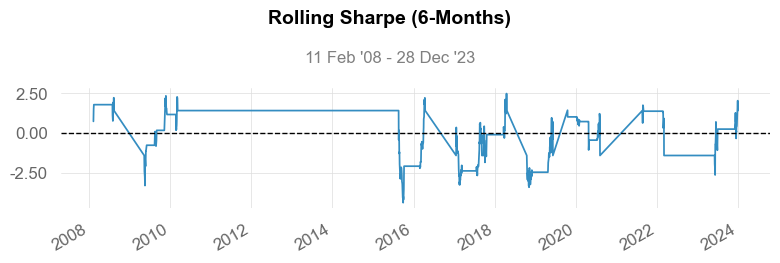

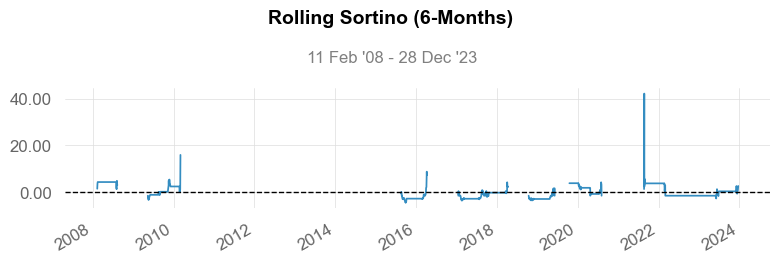

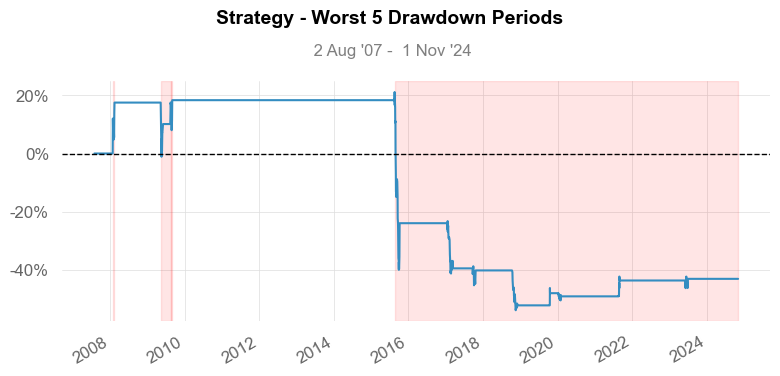

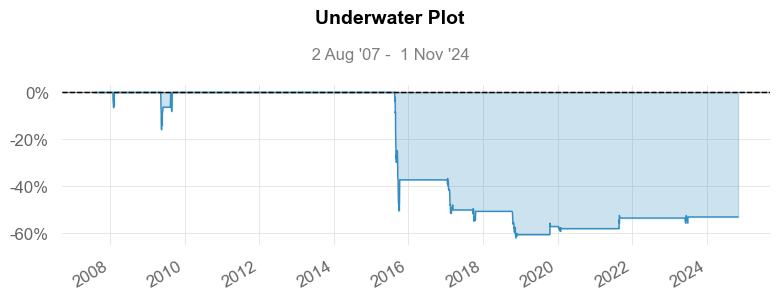

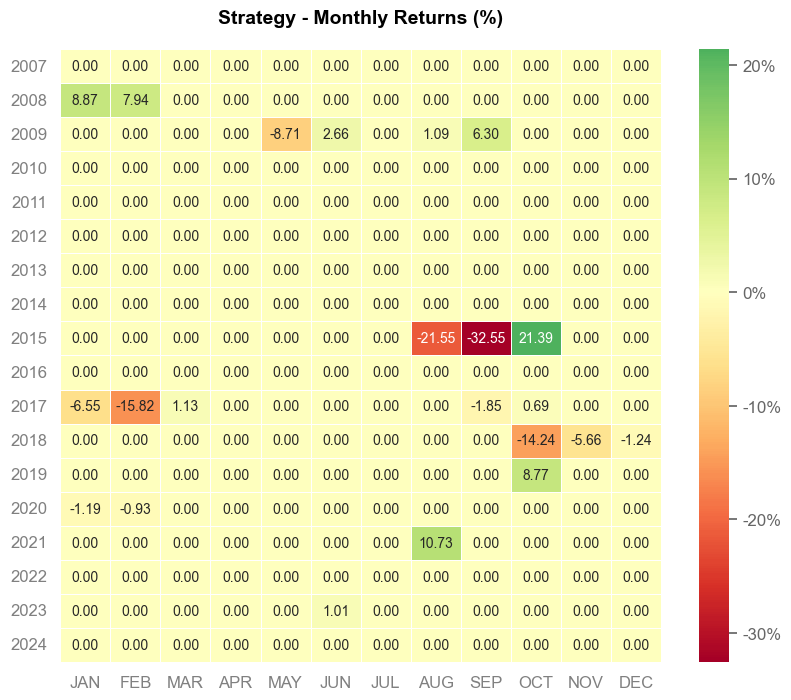

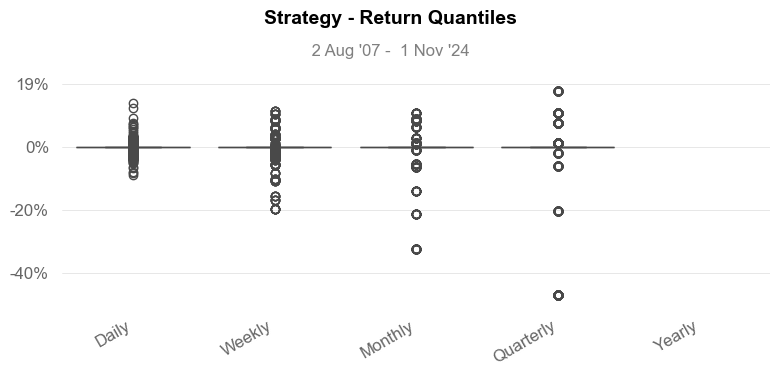

In [121]:
import warnings
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

qs.reports.full(data['strategy_returns'])

In [122]:
data[['retrn','strategy_returns']]

retrn  strategy_returns
Date                                  
2007-08-01       NaN               NaN
2007-08-02  0.016000               0.0
2007-08-03 -0.002861              -0.0
2007-08-06 -0.036639              -0.0
2007-08-07  0.039500               0.0
...              ...               ...
2024-10-28  0.023474               0.0
2024-10-29 -0.021068              -0.0
2024-10-30  0.007867               0.0
2024-10-31  0.005775               0.0
2024-11-01 -0.005435              -0.0

[4285 rows x 2 columns]